### S&P 500 Index Prediction Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np

In [3]:
#reading the data
data = pd.read_csv(r'C:\Users\DELL\Desktop\Final Project\i. hist_data\sp500_ind.csv',encoding='utf-8')

In [4]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,0,2017-06-15,2424.139893,2433.949951,2418.530029,2432.459961,2432.459961,3353050000,SP500_Ind
1,1,2017-06-16,2431.239990,2433.149902,2422.879883,2433.149902,2433.149902,5284720000,SP500_Ind
2,2,2017-06-19,2442.550049,2453.820068,2441.790039,2453.459961,2453.459961,3264700000,SP500_Ind
3,3,2017-06-20,2450.659912,2450.659912,2436.600098,2437.030029,2437.030029,3416510000,SP500_Ind
4,4,2017-06-21,2439.310059,2442.229980,2430.739990,2435.610107,2435.610107,3594820000,SP500_Ind


In [5]:
data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
1254,1254,2022-06-08,4147.120117,4160.140137,4107.200195,4115.770020,4115.770020,3090180000,SP500_Ind
1255,1255,2022-06-09,4101.649902,4119.100098,4017.169922,4017.820068,4017.820068,3192330000,SP500_Ind
1256,1256,2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3900.860107,3936120000,SP500_Ind
1257,1257,2022-06-13,3838.149902,3838.149902,3734.300049,3749.629883,3749.629883,4572820000,SP500_Ind
1258,1258,2022-06-14,3763.520020,3778.179932,3705.679932,3735.479980,3735.479980,4126400000,SP500_Ind


<h3>Predicting returns on stock price</h3>
 
- Here we will directly not predict future stock price, but will predict change in stock price ,because the return on stock price will be a stationery time series, which can give us better result than non stationery time series which is calculated using below formula 

- Return = (Price tomorrow  / Price today) -  1 


In [6]:
data['returns'] = data['Open'].pct_change()
data['returns'] = data['returns'].shift(-1)

In [7]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,returns
0,0,2017-06-15,2424.139893,2433.949951,2418.530029,2432.459961,2432.459961,3353050000,SP500_Ind,0.002929
1,1,2017-06-16,2431.239990,2433.149902,2422.879883,2433.149902,2433.149902,5284720000,SP500_Ind,0.004652
2,2,2017-06-19,2442.550049,2453.820068,2441.790039,2453.459961,2453.459961,3264700000,SP500_Ind,0.003320
3,3,2017-06-20,2450.659912,2450.659912,2436.600098,2437.030029,2437.030029,3416510000,SP500_Ind,-0.004631
4,4,2017-06-21,2439.310059,2442.229980,2430.739990,2435.610107,2435.610107,3594820000,SP500_Ind,-0.000783


<h3>Conclusion :</h3>

- So based on given input ['Date','Open','High','Low','Close','Volume'], return columns tell us the return for next day , that is why we used shift operator.

In [8]:
data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,returns
1254,1254,2022-06-08,4147.120117,4160.140137,4107.200195,4115.770020,4115.770020,3090180000,SP500_Ind,-0.010964
1255,1255,2022-06-09,4101.649902,4119.100098,4017.169922,4017.820068,4017.820068,3192330000,SP500_Ind,-0.031027
1256,1256,2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3900.860107,3936120000,SP500_Ind,-0.034279
1257,1257,2022-06-13,3838.149902,3838.149902,3734.300049,3749.629883,3749.629883,4572820000,SP500_Ind,-0.019444
1258,1258,2022-06-14,3763.520020,3778.179932,3705.679932,3735.479980,3735.479980,4126400000,SP500_Ind,NaN


<h3> Conclusion : </h3>

- The last row is Null, because there is no next day to calculate , return on current day price

In [9]:
data.shape

(1259, 10)

<h3> Conclusion </h3>

- We have 1259 row and 10 columns, and since last row is Null, we need to drop it

In [10]:
df = data[['Date','Open','High','Low','Close','Volume','returns']]

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,returns
0,2017-06-15,2424.139893,2433.949951,2418.530029,2432.459961,3353050000,0.002929
1,2017-06-16,2431.239990,2433.149902,2422.879883,2433.149902,5284720000,0.004652
2,2017-06-19,2442.550049,2453.820068,2441.790039,2453.459961,3264700000,0.003320
3,2017-06-20,2450.659912,2450.659912,2436.600098,2437.030029,3416510000,-0.004631
4,2017-06-21,2439.310059,2442.229980,2430.739990,2435.610107,3594820000,-0.000783


In [12]:
df.tail()

,Date,Open,High,Low,Close,Volume,returns
1254,2022-06-08,4147.120117,4160.140137,4107.200195,4115.770020,3090180000,-0.010964
1255,2022-06-09,4101.649902,4119.100098,4017.169922,4017.820068,3192330000,-0.031027
1256,2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3936120000,-0.034279
1257,2022-06-13,3838.149902,3838.149902,3734.300049,3749.629883,4572820000,-0.019444
1258,2022-06-14,3763.520020,3778.179932,3705.679932,3735.479980,4126400000,NaN


<h2> Plotting daily return on stock price </h2>

In [13]:
import matplotlib.pyplot as plt


Mean change in stock price : 0.0072080176890231855


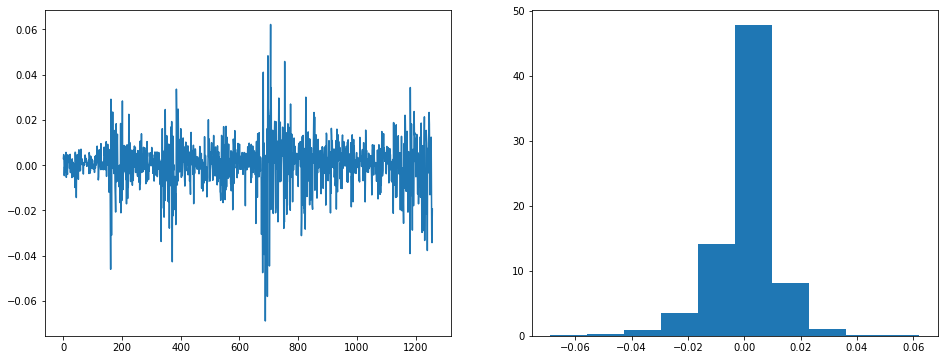

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(df['returns'])
ax2.hist(df['returns'], density = True)
print("Mean change in stock price :", abs(df['returns']).mean())

<h3> Conclusion </h3>

- From the above plot we can see that before covid in most cases fluctuation in return on index values on alternate days was between 0 - 0.06 but after covid it increased and reached in the range of 0 - 0.04.

- But, During covid period daily fluctuation in return on index values reached to even 0.06%, which tells us how volatile the market had become during covid time
- An the maximum return values lies in the range of -0.01 to + 0.01

In [15]:
data.dropna(inplace=True)
X = data[['Open','High','Low','Close','Volume']].values

In [16]:
y = data[['returns']].values

In [17]:
X.shape, y.shape

((1258, 5), (1258, 1))

<h3> Conclusion </h3>

- After dropping the Null values and unnecessery columns, we are left with 1258 rows and 5 columns in independent features
- And we have 1258 rows in dependent variable whih are continyous variable.

# LSTM MODEL

An enhanced RNN, or sequential network, called a long short-term memory network, permits information to endure. It is capable of resolving the RNN's vanishing gradient issue. RNNs, also referred to as recurrent neural networks, are utilised for persistent memory.

<h3>LSTM Architecture</h3>

LSTM functions on a high level very similarly to an RNN cell. The LSTM network's internal operation is seen below. Each of the three components that make up the LSTM—the input gate, forget gate, and update gate—performs a specific function.


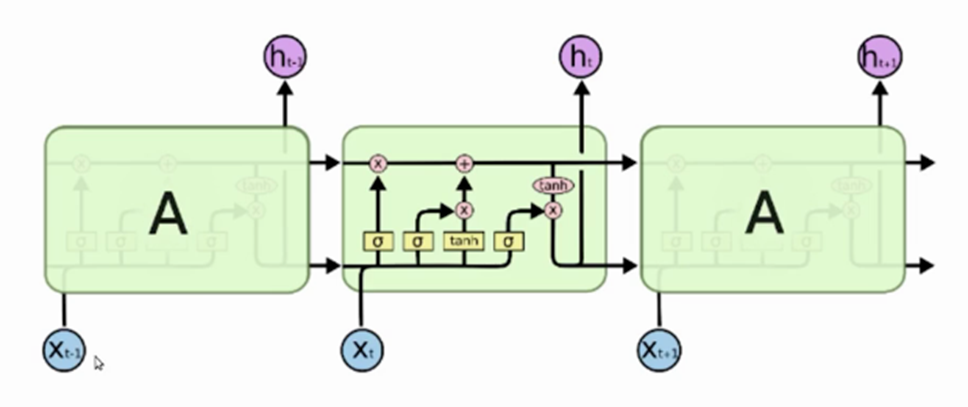 

Fig. LSTM architecture diagram by Christopher Olah (https://colah.github.io/posts/2015-08-Understanding-LSTMs/)


<h4>i. Forget Gate</h4>
The initial step in an LSTM network cell is to choose whether to keep or discard the data from the preceding timestamp. The forget gate equation is given below.


                                        ft = σ(Xt * Uf  + Ht-1* Wf)
                                        
                                        
•	Xt: input to the current timestamp.
•	Uf: weight associated with the input
•	Ht-1: The hidden state of the previous timestamp
•	Wf: It is the weight matrix associated with hidden state


<h4>ii.Input Gate</h4>
The value of the fresh information carried by the input is measured by the input gate. The input gate's equation is shown below.
                                          it = σ(Xt * Ui  + Ht-1* Wi
 
Here,
•	Xt: Input at the current timestamp t
•	Ui: weight matrix of input
•	Ht-1: A hidden state at the previous timestamp
•	Wi: Weight matrix of input associated with hidden state


<h4>iii.Output Gate</h4>
The Output gate's equation, which is quite similar to the equations for the two earlier gates, is shown below.

                                            Ot = σ(Xt * Uo  + Ht-1* Wo

                                           
 
Due to this sigmoid function, it will also have a value between 0 and 1. We will now use Ot and tanh of the updated cell state to determine the current hidden state. As shown below.
                                          
                                          Ht = Ot * tanh(Ct)
 
It turns out that the concealed state depends on both the present output and long-term memory (Ct). Simply activate SoftMax on hidden state Ht if you need to take the output of the current timestamp.
 
                                           Output = Softmax(Ht)

<h1> 1. Data Preprocessing </h1>

<h3> Step 1.i. Scaling the feature variable </h3>

- In machine learning algorithms if the values of the features are closer to each other, there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower.

In [18]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()
X_scaled=scaler_x.fit_transform(np.array(X))
Y_scaled=scaler_y.fit_transform(np.array(y))

<h3>Step 1.ii. Splitting the data into train and test data</h3>

In [19]:
split = int(len(X_scaled) * 0.9)
print(split)

1132


In [20]:
##splitting dataset into train and test split
X_tr, X_tst = X_scaled[:split], X_scaled[split:]


In [21]:
X_tr.shape, X_tst.shape

((1132, 5), (126, 5))

In [22]:
##splitting dataset into train and test split
y_tr, y_tst = Y_scaled[:split], Y_scaled[split:]

In [23]:
y_tr.shape, y_tst.shape

((1132, 1), (126, 1))

<h3> Conclusion </h3>

- We have 1132 rows in training data and 126 rows in test data

<h3>1.iii. Creating Dataset </h3>

- Here we will be using LSTM to train our model, which takes sequence of time step input, instead of single input, so we need to prepare our dataset, which are sequence of time step input.

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(data_x, data_y, time_step=1):
	data_X, data_Y = [], []
	for i in range(len(data_x)-time_step+1):
		a = data_x[i:(i+time_step), : ]   ###i=0, 0,1,2,3-----99   100 
		data_X.append(a)
		data_Y.append(data_y[i + time_step -1])
	return np.array(data_X), np.array(data_Y)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10 #e will use previous 10 days data to predict future date index value
X_train, y_train = create_dataset(X_tr,y_tr, time_step)
X_test, y_test = create_dataset(X_tst,y_tst, time_step)

In [28]:
X_train.shape, y_train.shape

((1123, 10, 5), (1123, 1))

In [29]:
print('Number of input rows = ',X_train.shape[0])
print('Number of sequence input which will be fed into lstm model to train it = ',X_train.shape[1])
print('Number of columns = ',X_train.shape[2])

Number of input rows =  1123
Number of sequence input which will be fed into lstm model to train it =  10
Number of columns =  5


In [30]:
X_test.shape, y_test.shape

((117, 10, 5), (117, 1))

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , X_test.shape[2])

<h1>2. Creating LSTM model</h1>

In [32]:
## importing necessery library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [33]:
#creating stacked model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

- Number of trainable parameters = 51,651, thsese parameter will predict future price for stock data based on 10 previous days



In [35]:
#training the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
18/18 [==============================] - 15s 166ms/step - loss: 0.0998 - val_loss: 0.0226
Epoch 2/60
18/18 [==============================] - 1s 29ms/step - loss: 0.0235 - val_loss: 0.0275
Epoch 3/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 4/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 5/60
18/18 [==============================] - 1s 29ms/step - loss: 0.0109 - val_loss: 0.0123
Epoch 6/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0104 - val_loss: 0.0121
Epoch 7/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0107 - val_loss: 0.0121
Epoch 8/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0095 - val_loss: 0.0128
Epoch 9/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0097 - val_loss: 0.0118
Epoch 10/60
18/18 [==============================] - 1s 28ms/step - loss: 0.0092 - val_loss: 0.0118
Epoch 1

<h3> Conclusion </h3>

 - Imp point to be noted here is that, mean squarred error at each epoch is not for predicted price of stock , but for return values.

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 [==============================] - 0s 13ms/step


In [37]:
train_predict.shape, test_predict.shape

((1123, 1), (117, 1))

<h3> Creating single row data</h3>

- During the training of our model we used 63 days of stok info, but to analyse the performence of our model, we will only take last day stock info and ignore the remaining 62 days info.

In [38]:
X_train.shape

(1123, 10, 5)

In [39]:
x_train = []
for timestep in X_train :
  x_train.append(timestep[time_step-1])

In [40]:
x_train[0]

array([0.05489299, 0.05649174, 0.09124555, 0.07943623, 0.25686185])

In [41]:
y_tr[0]

array([0.54796121])

In [42]:
x_test = []
for timestep in X_test :
  x_test.append(timestep[time_step-1])

<h3> Scaling up the data </h3> 

- During the min max scaling process, we scale down every values in between 0-1, and now we will upscale the values in their original values

In [43]:
x_train = scaler_x.inverse_transform(x_train)

In [44]:
y_train = scaler_y.inverse_transform(y_train)

In [45]:
x_train[0], y_train[0]

(array([2.42869995e+03, 2.44296997e+03, 2.42802002e+03, 2.44068994e+03,
        3.50080000e+09]),
 array([0.00563262]))

In [46]:
train_predict=scaler_y.inverse_transform(train_predict)

In [47]:
train_predict[0]

array([-0.00019619], dtype=float32)

In [48]:
x_test = scaler_x.inverse_transform(x_test)

In [49]:
y_test = y_test.reshape(-1,1)

In [50]:
y_test = scaler_y.inverse_transform(y_test)

In [51]:
test_predict=scaler_y.inverse_transform(test_predict)

<h1>4.Creating Dataframe for train and test data to better analyse and visualise the data.</h1>

In [52]:
#concatinating dependent and independent features in training data
X_train = np.concatenate((x_train,y_train,train_predict), axis = 1)

In [53]:
#concatinating dependent and independent features in test data
X_test = np.concatenate((x_test,y_test,test_predict), axis = 1)

In [54]:
#Creating pandas dataframe for training data
X_train = pd.DataFrame(X_train, columns = ['Open','High','Low','Close','Volume','returns','pred_return'])

In [55]:
#Creating pandas dataframe for test data
X_test = pd.DataFrame(X_test, columns = ['Open','High','Low','Close','Volume','returns','pred_return'])

In [56]:
X_train.head()

,Open,High,Low,Close,Volume,returns,pred_return
0,2428.699951,2442.969971,2428.020020,2440.689941,3.500800e+09,0.005633,-0.000196
1,2442.379883,2442.729980,2405.699951,2419.699951,3.900280e+09,-0.005396,-0.000182
2,2429.199951,2432.709961,2421.649902,2423.409912,3.361590e+09,0.000902,-0.000260
3,2431.389893,2439.169922,2428.689941,2429.010010,1.962290e+09,-0.000251,-0.000240
4,2430.780029,2434.899902,2422.050049,2432.540039,3.367220e+09,-0.003020,-0.000234


<h3> Calculating original future stock price from return values </h3>

- Return = (Price tomorrow  / Price today) -  1 
- =>  Return + 1 = Price tomorrow  / Price today
- =>  Price tomorrow = Price today * (Return + 1)

In [57]:
X_train['pred_output'] = X_train['Open'] * (1+X_train['pred_return'])


In [58]:
#this future stock price column will be used to test our prediction
X_train['future_output'] = X_train['Open'].shift(-1)

In [59]:
X_train.head()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
0,2428.699951,2442.969971,2428.020020,2440.689941,3.500800e+09,0.005633,-0.000196,2428.223459,2442.379883
1,2442.379883,2442.729980,2405.699951,2419.699951,3.900280e+09,-0.005396,-0.000182,2441.935696,2429.199951
2,2429.199951,2432.709961,2421.649902,2423.409912,3.361590e+09,0.000902,-0.000260,2428.567607,2431.389893
3,2431.389893,2439.169922,2428.689941,2429.010010,1.962290e+09,-0.000251,-0.000240,2430.806746,2430.780029
4,2430.780029,2434.899902,2422.050049,2432.540039,3.367220e+09,-0.003020,-0.000234,2430.211942,2423.439941


In [60]:
X_train.tail()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
1118,4548.370117,4612.600098,4540.509766,4591.669922,3.305690e+09,0.018380,-0.000586,4545.703317,4631.970215
1119,4631.970215,4694.040039,4631.970215,4686.750000,3.334320e+09,0.012714,-0.000581,4629.277169,4690.859863
1120,4690.859863,4705.060059,4674.520020,4701.209961,3.061550e+09,0.000030,-0.000578,4688.150762,4691.000000
1121,4691.000000,4695.259766,4665.979980,4667.450195,2.851660e+09,-0.000716,-0.000546,4688.440289,4687.640137
1122,4687.640137,4713.569824,4670.240234,4712.020020,2.858310e+09,0.004834,-0.000498,4685.307422,NaN


<h3> Conclusion </h3>

- There is null values in future output column for last row, becaues there is no future values for last column

In [61]:
X_test['pred_output'] = X_test['Open'] * (1+X_test['pred_return'])


In [62]:
X_test['future_output'] = X_test['Open'].shift(-1)

In [63]:
X_test.head()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
0,4733.990234,4791.490234,4733.990234,4791.189941,2.264120e+09,0.012991,-0.000489,4731.676668,4795.490234
1,4795.490234,4807.020020,4780.040039,4786.350098,2.217050e+09,-0.001428,-0.000460,4793.283109,4788.640137
2,4788.640137,4804.060059,4778.080078,4793.060059,2.369370e+09,0.001167,-0.000437,4786.549413,4794.229980
3,4794.229980,4808.930176,4775.330078,4778.729980,2.390990e+09,-0.003967,-0.000426,4792.187848,4775.209961
4,4775.209961,4786.830078,4765.750000,4766.180176,2.446190e+09,0.000614,-0.000404,4773.282069,4778.140137


In [64]:
X_test.tail()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
112,4096.470215,4164.859863,4080.189941,4160.680176,3.476470e+09,0.012364,-0.000752,4093.387725,4147.120117
113,4147.120117,4160.140137,4107.200195,4115.770020,3.090180e+09,-0.010964,-0.000749,4144.012641,4101.649902
114,4101.649902,4119.100098,4017.169922,4017.820068,3.192330e+09,-0.031027,-0.000777,4098.463147,3974.389893
115,3974.389893,3974.389893,3900.159912,3900.860107,3.936120e+09,-0.034279,-0.000814,3971.155403,3838.149902
116,3838.149902,3838.149902,3734.300049,3749.629883,4.572820e+09,-0.019444,-0.000853,3834.877085,NaN


In [65]:
#let' analyse the loss
# function to calculate absolute percentage error
def cal_ape(y_true, y_pred):
    ape = abs((y_true-y_pred)/y_true) *100
    return ape

In [66]:
X_train['abs_perc_error'] = cal_ape(X_train['pred_output'], X_train['future_output'])

In [67]:
X_test['abs_perc_error'] = cal_ape(X_test['pred_output'], X_test['future_output'])

In [68]:
X_test.head()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output,abs_perc_error
0,4733.990234,4791.490234,4733.990234,4791.189941,2.264120e+09,0.012991,-0.000489,4731.676668,4795.490234,1.348646
1,4795.490234,4807.020020,4780.040039,4786.350098,2.217050e+09,-0.001428,-0.000460,4793.283109,4788.640137,0.096864
2,4788.640137,4804.060059,4778.080078,4793.060059,2.369370e+09,0.001167,-0.000437,4786.549413,4794.229980,0.160461
3,4794.229980,4808.930176,4775.330078,4778.729980,2.390990e+09,-0.003967,-0.000426,4792.187848,4775.209961,0.354283
4,4775.209961,4786.830078,4765.750000,4766.180176,2.446190e+09,0.000614,-0.000404,4773.282069,4778.140137,0.101776


In [69]:
X_test.tail()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output,abs_perc_error
112,4096.470215,4164.859863,4080.189941,4160.680176,3.476470e+09,0.012364,-0.000752,4093.387725,4147.120117,1.312663
113,4147.120117,4160.140137,4107.200195,4115.770020,3.090180e+09,-0.010964,-0.000749,4144.012641,4101.649902,1.022264
114,4101.649902,4119.100098,4017.169922,4017.820068,3.192330e+09,-0.031027,-0.000777,4098.463147,3974.389893,3.027312
115,3974.389893,3974.389893,3900.159912,3900.860107,3.936120e+09,-0.034279,-0.000814,3971.155403,3838.149902,3.349290
116,3838.149902,3838.149902,3734.300049,3749.629883,4.572820e+09,-0.019444,-0.000853,3834.877085,NaN,NaN


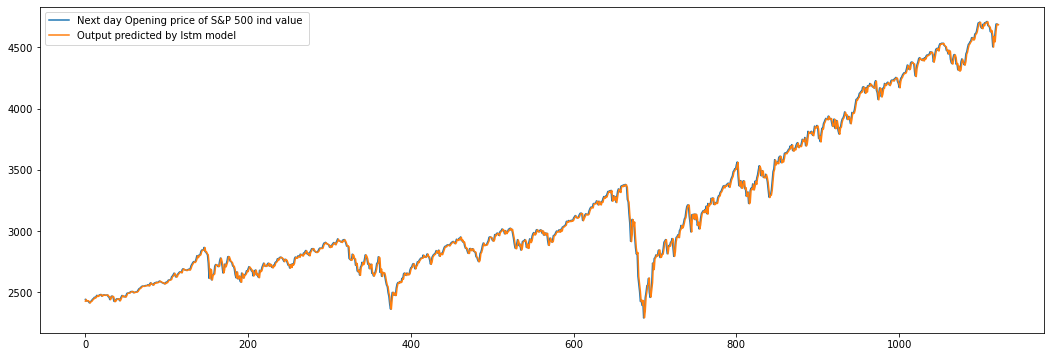

In [70]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_train['future_output'],label='Next day Opening price of S&P 500 ind value ')
plt.plot(X_train['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

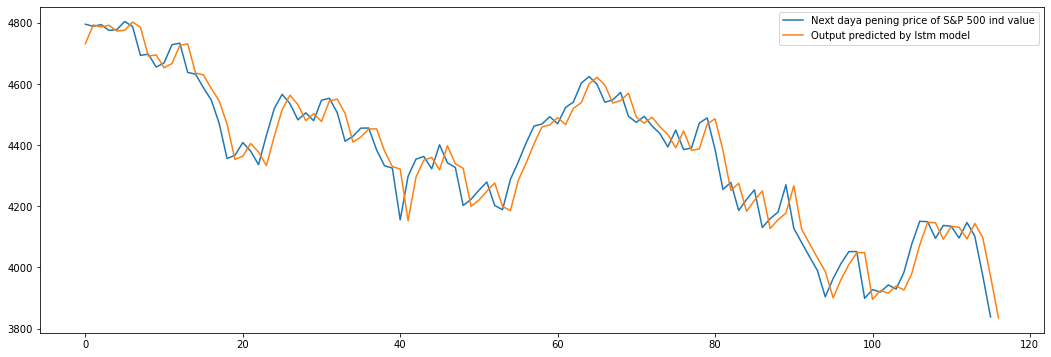

In [71]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_test['future_output'],label='Next daya pening price of S&P 500 ind value')
plt.plot(X_test['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

In [72]:
def plot_dist_error(data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))

    ax1.plot(data.dropna())
    ax2.hist(data.dropna(), density = True)
    
    mape = data.mean()
    print(f'Mean absolute percentage error of the model is : {mape:.3f} %')

Mean absolute percentage error of the model is : 0.694 %


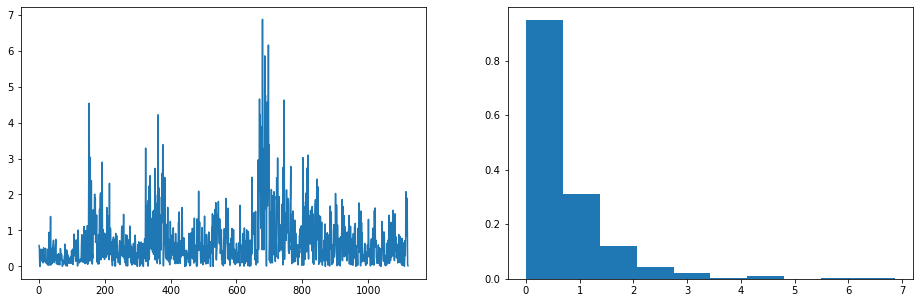

In [73]:
plot_dist_error(X_train['abs_perc_error'])

Mean absolute percentage error of the model is : 1.132 %


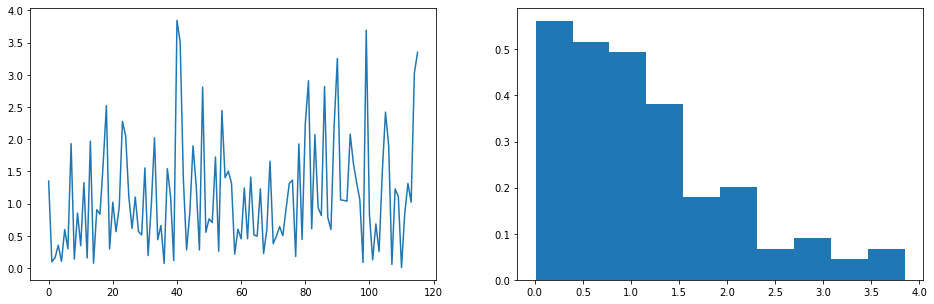

In [74]:
plot_dist_error(X_test['abs_perc_error'])

<h2> Conclusion </h2>

- From the above plot we can see that,about 75% of the time error lies between 0% to 1.5%.
- In some cases error may even shoot up to 3.5% which is not a good sign for our model, but still this is better than ARIMA model, where highest ape(abs percentage error) was 4.5% and mape was 1.232%
- Mape(mean abs percentage error) for our LSTM model is 1.132%, which is good model, but still this model should not be used to perform intraday trading.